In [1]:
# Dataset https://archive.ics.uci.edu/ml/datasets/Adult


In [7]:
import pandas as pd
import io
import requests

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [24]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# Given the dataset is a *.data file and doesn't have headers we will include them for working with the columns
headers = ['age', 'work_class', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
s=requests.get(url).content
dataset=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names = headers, delimiter = ", ")
#dataset=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
dataset

<ipython-input-24-cd7b896bc831>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataset=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names = headers, delimiter = ", ")


,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
# Given a lot of columns are cualitative variables and the classification algorithms uses numerical variables
# We're going to prepare the data with an appropiate format.

In [59]:
# Mapping functions

work_class_mapper = {
    "Never-worked": 1,
    "Without-pay": 2,
    "State-gov": 3,
    "Local-gov": 4,
    "Federal-gov": 5,
    "Self-emp-inc": 6,
    "Self-emp-not-inc": 7,
    "Private": 8,
    "None": 9,
    "?": 0
}
def transform_work_class(x):
    return work_class_mapper[x]

education_mapper = {
    "Preschool": 1,
    "1st-4th": 2,
    "5th-6th": 3,
    "7th-8th": 4,
    "9th": 5,
    "10th": 6,
    "11th": 7,
    "12th": 8,
    "HS-grad": 9,
    "Bachelors": 10,
    "Assoc-acdm": 11,
    "Assoc-voc": 12,
    "Some-college": 13,
    "Prof-school": 14,
    "Masters": 15,
    "Doctorate": 16,
    "?": 0
}
def transform_education(x):
    return education_mapper[x]

marital_status_mapper = {
    "Married-civ-spouse": 1,
    "Divorced": 2,
    "Never-married": 3,
    "Separated": 4,
    "Widowed": 5,
    "Married-spouse-absent": 6,
    "Married-AF-spouse": 7,
    "?": 0
}
def transform_marital_status(x):
    return marital_status_mapper[x]

occupation_mapper = {
    "Tech-support": 1,
    "Craft-repair": 2,
    "Other-service": 3,
    "Sales": 4,
    "Exec-managerial": 5,
    "Prof-specialty": 6,
    "Handlers-cleaners": 7,
    "Machine-op-inspct": 8,
    "Adm-clerical": 9,
    "Farming-fishing": 10,
    "Transport-moving": 11,
    "Priv-house-serv": 12,
    "Protective-serv": 13,
    "Armed-Forces": 14,
    "?": 0
}
def transform_occupation(x):
    return occupation_mapper[x]

relationship_mapper = {
    "Wife": 1,
    "Own-child": 2,
    "Husband": 3,
    "Not-in-family": 4,
    "Other-relative": 5,
    "Unmarried": 6,
    "?": 0
}
def transform_relationship(x):
    return relationship_mapper[x]

race_mapper = {
    "White": 1,
    "Asian-Pac-Islander": 2,
    "Amer-Indian-Eskimo": 3,
    "Other": 4,
    "Black": 5,
    "?": 0
}
def transform_race(x):
    return race_mapper[x]

sex_mapper = {
    "Male": 1,
    "Female": 2,
    "?": 0
}
def transform_sex(x):
    return sex_mapper[x]

country_mapper = {
    "United-States": 1, 
    "Cambodia": 2, 
    "England": 3, 
    "Puerto-Rico": 4, 
    "Canada": 5, 
    "Germany": 6, 
    "Outlying-US(Guam-USVI-etc)": 7, 
    "India": 8, 
    "Japan": 9, 
    "Greece": 10, 
    "South": 11, 
    "China": 12,
    "Cuba": 13, 
    "Iran": 14, 
    "Honduras": 15, 
    "Philippines": 16, 
    "Italy": 17, 
    "Poland": 18, 
    "Jamaica": 19, 
    "Vietnam": 20, 
    "Mexico": 21, 
    "Portugal": 22, 
    "Ireland": 23, 
    "France": 24, 
    "Dominican-Republic": 25, 
    "Laos": 26, 
    "Ecuador": 27, 
    "Taiwan": 28, 
    "Haiti": 29, 
    "Columbia": 30, 
    "Hungary": 31, 
    "Guatemala": 32, 
    "Nicaragua": 33, 
    "Scotland": 34, 
    "Thailand": 35, 
    "Yugoslavia": 36, 
    "El-Salvador": 37, 
    "Trinadad&Tobago": 38, 
    "Peru": 39, 
    "Hong": 40, 
    "Holand-Netherlands": 41,
    "?": 0
}
def transform_country(x):
    return country_mapper[x]

salary_mapper = {
    ">50K": 1,
    "<=50K": 2,
    ">50K.": 1,
    "<=50K.": 2,
    "?": 0
}
def transform_salary(x):
    return salary_mapper[x]

In [65]:
# The following lines contains the mapping configurations for ML proposals
dataset['work_class_transformed'] = dataset['work_class'].apply(lambda x: transform_work_class(x))
dataset['education_transformed'] = dataset['education'].apply(lambda x: transform_education(x))
dataset['marital_status_transformed'] = dataset['marital_status'].apply(lambda x: transform_marital_status(x))
dataset['occupation_transformed'] = dataset['occupation'].apply(lambda x: transform_occupation(x))
dataset['relationship_transformed'] = dataset['relationship'].apply(lambda x: transform_relationship(x))
dataset['race_transformed'] = dataset['race'].apply(lambda x: transform_race(x))
dataset['sex_transformed'] = dataset['sex'].apply(lambda x: transform_sex(x))
dataset['native_country_transformed'] = dataset['native_country'].apply(lambda x: transform_country(x))
dataset['salary_transformed'] = dataset['salary'].apply(lambda x: transform_salary(x))

dataset

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,work_class_transformed,education_transformed,marital_status_transformed,occupation_transformed,relationship_transformed,race_transformed,sex_transformed,country_transformed,salary_transformed,native_country_transformed
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,3,10,3,9,4,1,1,1,2,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,7,10,1,5,3,1,1,1,2,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,8,9,2,7,4,1,1,1,2,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,8,7,1,7,3,5,1,1,2,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,8,10,1,6,1,5,2,13,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,8,11,1,1,1,1,2,1,2,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,8,9,1,8,3,1,1,1,1,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,8,9,5,9,6,1,2,1,2,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,8,9,3,9,2,1,1,1,2,1


In [63]:
x_columns = ['age', 'work_class_transformed', 'fnlwgt', 'education_transformed', 'education_num', 'marital_status_transformed', 'occupation_transformed', 'relationship_transformed', 'race_transformed', 'sex_transformed', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country_transformed']
target_column_name = 'salary_transformed'
y_columns = [target_column_name]
target_classes_name = ['>50K', '<=50K']

In [8]:
#train=dataset.sample(frac=0.6,random_state=200)
#test=dataset.drop(train.index)

In [40]:
dataset.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,work_class_transformed,education_transformed,marital_status_transformed,occupation_transformed,relationship_transformed,race_transformed,sex_transformed,country_transformed,salary_transformed
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,6.853352,10.303953,2.077485,5.410614,3.380854,1.459752,1.330795,2.462486,1.759190
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,2.196733,2.722905,1.185543,3.178843,1.237468,1.211933,0.470506,5.583129,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,7.000000,9.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,8.000000,10.000000,2.000000,5.000000,3.000000,1.000000,1.000000,1.000000,2.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,8.000000,13.000000,3.000000,8.000000,4.000000,1.000000,2.000000,1.000000,2.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,8.000000,16.000000,7.000000,14.000000,6.000000,5.000000,2.000000,41.000000,2.000000


In [41]:
dataset.corr(method='pearson')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,work_class_transformed,education_transformed,marital_status_transformed,occupation_transformed,relationship_transformed,race_transformed,sex_transformed,country_transformed,salary_transformed
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.114059,-0.015003,-0.220938,0.000992,0.128919,-0.029869,-0.088832,-0.037382,-0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,0.019092,-0.043424,0.024079,0.004532,0.014773,0.098406,-0.026858,0.098288,0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,-0.051581,0.745268,-0.107648,0.000234,-0.031898,-0.078799,-0.012280,-0.159624,-0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.002430,0.078861,-0.074308,-0.004577,-0.026656,-0.019990,-0.048480,-0.016640,-0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,-0.002043,0.052726,-0.066966,-0.006561,-0.030640,-0.023926,-0.045567,-0.020083,-0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.112513,0.079427,-0.221882,0.104417,0.056941,-0.054443,-0.229309,-0.015522,-0.229689
work_class_transformed,-0.114059,0.019092,-0.051581,0.002430,-0.002043,0.112513,1.000000,-0.061295,-0.025886,0.243999,0.026602,-0.037281,-0.053619,0.038718,-0.004868
education_transformed,-0.015003,-0.043424,0.745268,0.078861,0.052726,0.079427,-0.061295,1.000000,-0.062221,-0.002838,-0.035733,-0.052976,0.028650,-0.163144,-0.221157
marital_status_transformed,-0.220938,0.024079,-0.107648,-0.074308,-0.066966,-0.221882,-0.025886,-0.062221,1.000000,-0.018304,0.362819,0.131782,0.380043,0.047570,0.377794
occupation_transformed,0.000992,0.004532,0.000234,-0.004577,-0.006561,0.104417,0.243999,-0.002838,-0.018304,1.000000,0.028365,0.027632,0.011341,0.003960,0.007742


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

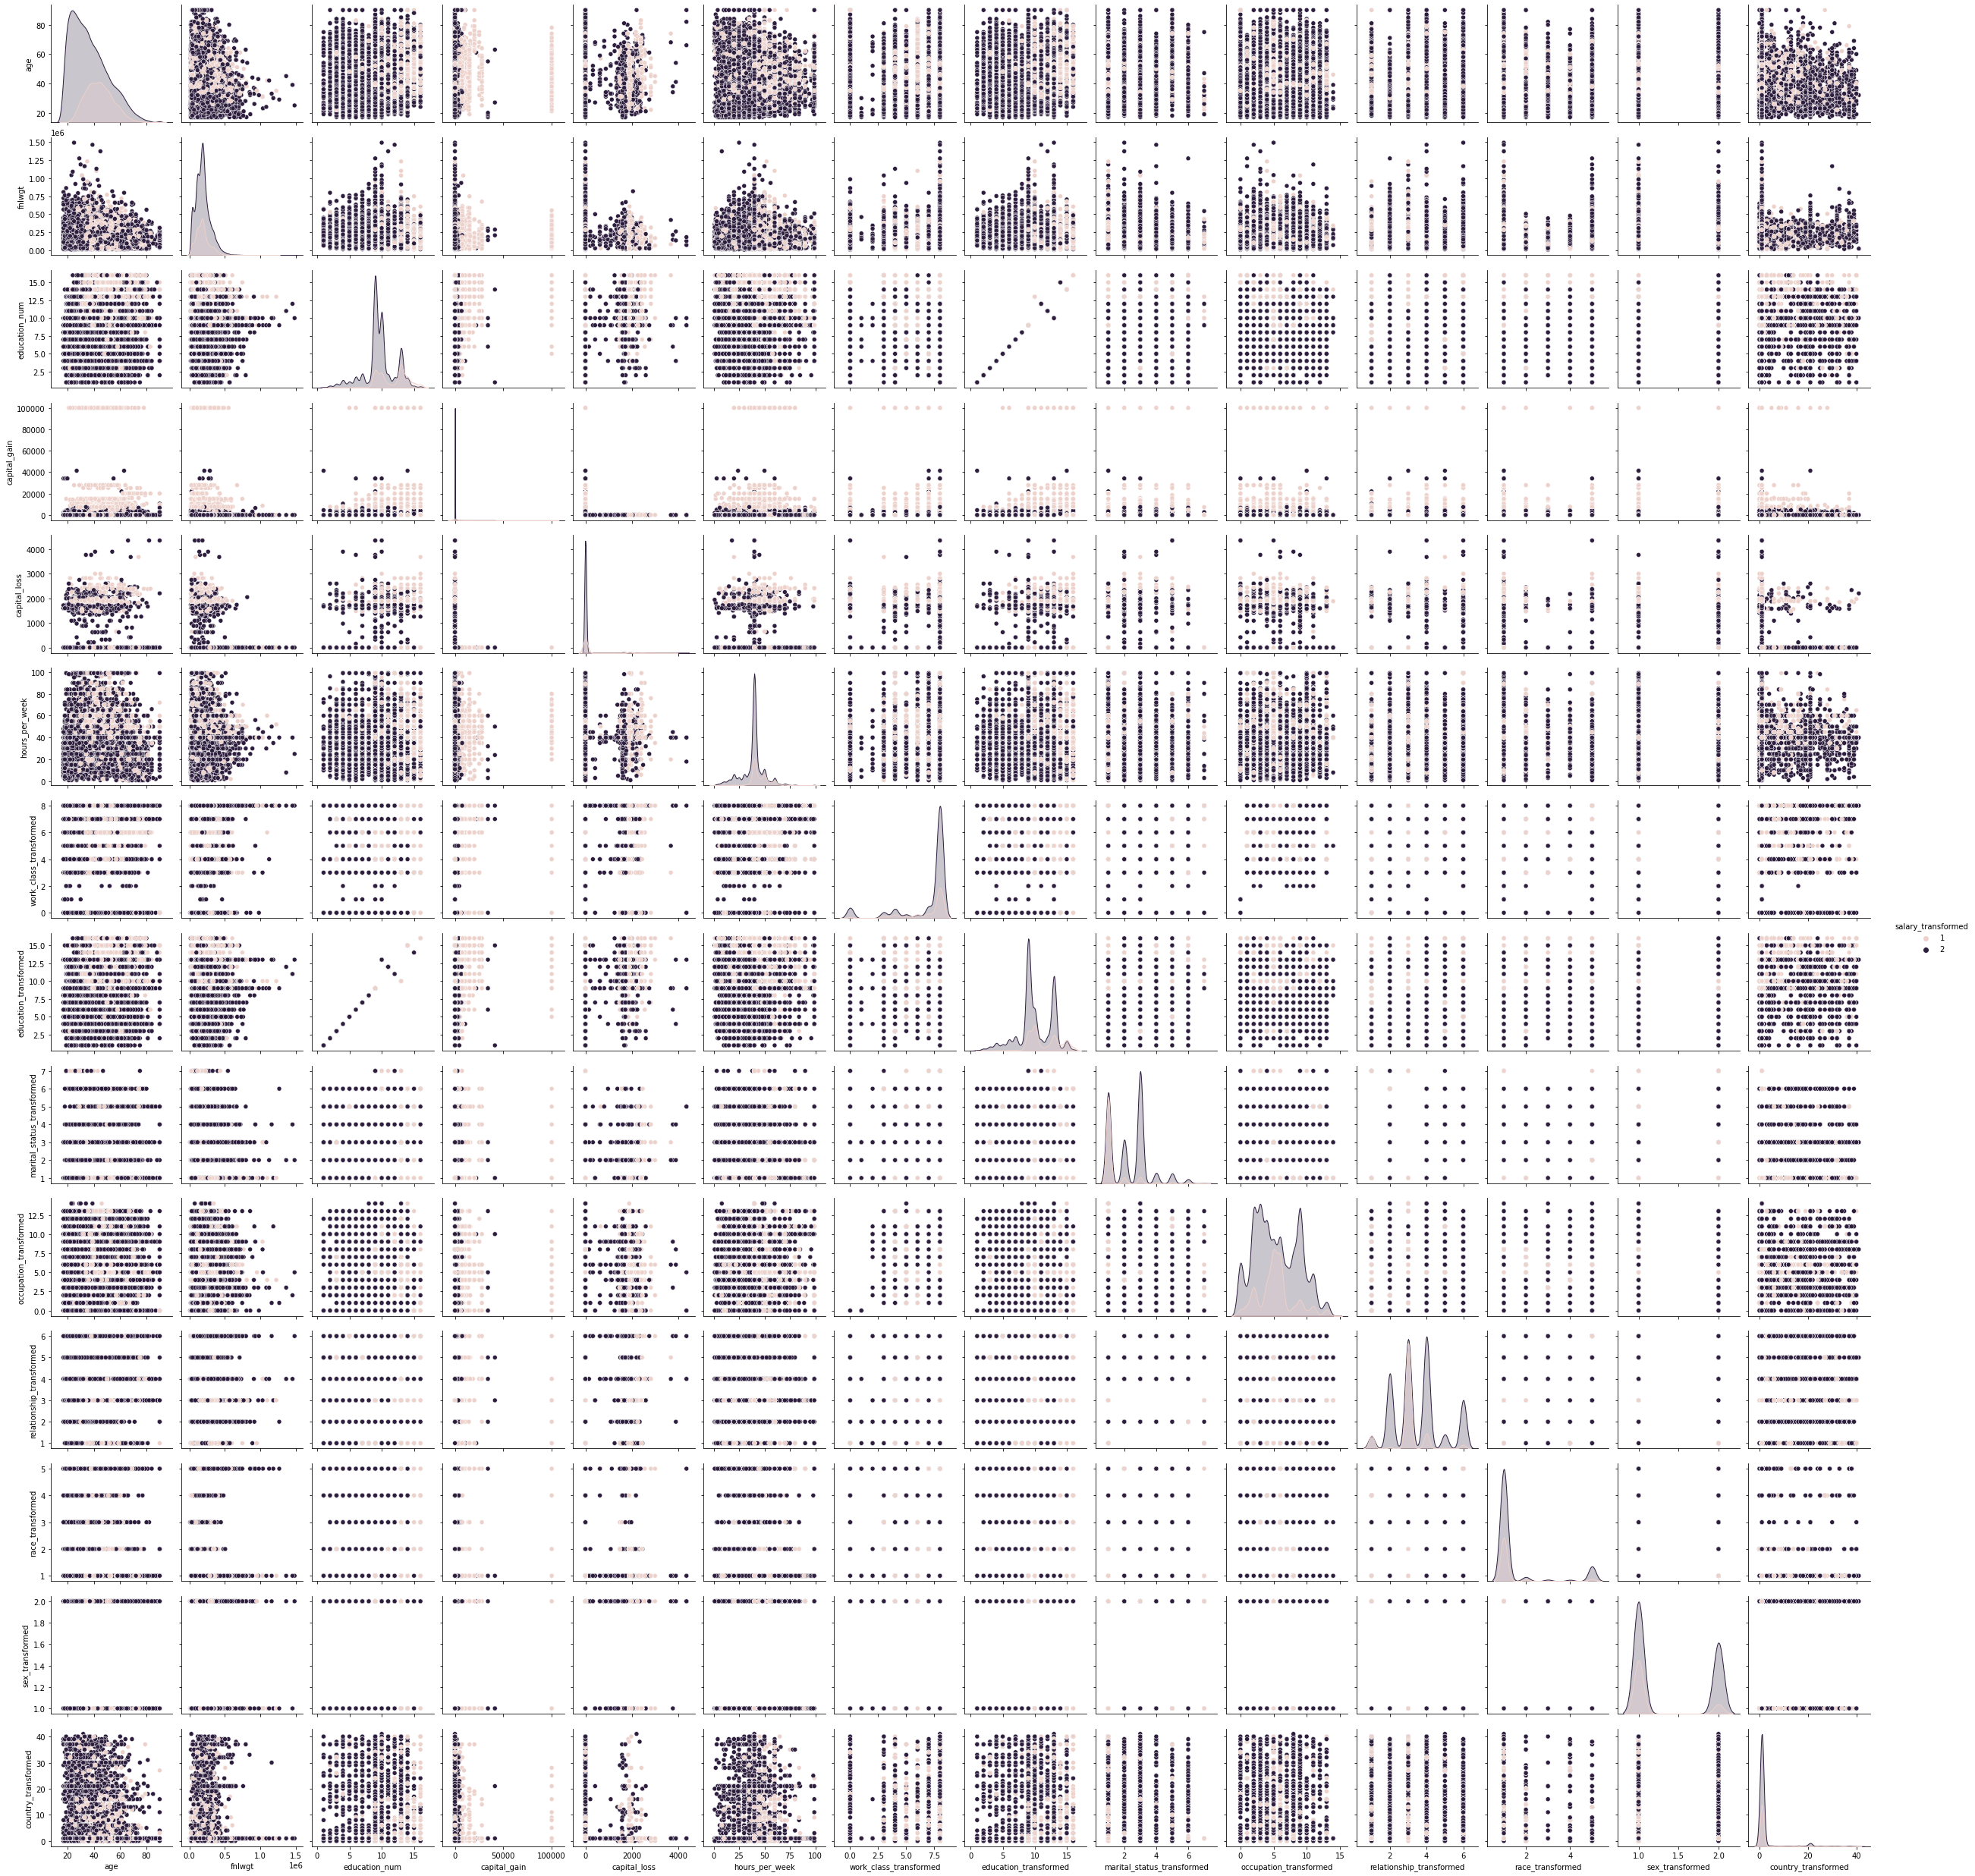

In [44]:
g = sns.pairplot(dataset,hue=target_column_name)
plt.show()

In [45]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm_name', 'mean_absolute_error', 'mean_squared_error', 'root_mean_squared_error', 'elapsed_time'])
algorithm_scores

,algorithm_name,mean_absolute_error,mean_squared_error,root_mean_squared_error,elapsed_time


In [57]:
#Import test dataset from url

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
# Given the dataset is a *.data file and doesn't have headers we will include them for working with the columns
headers = ['age', 'work_class', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
s=requests.get(url).content
test=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names = headers, delimiter = ", ", skiprows=1)
#dataset=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
test

<ipython-input-57-e07553051c2b>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names = headers, delimiter = ", ", skiprows=1)


,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [66]:
# The following lines contains the mapping configurations for ML proposals
test['work_class_transformed'] = test['work_class'].apply(lambda x: transform_work_class(x))
test['education_transformed'] = test['education'].apply(lambda x: transform_education(x))
test['marital_status_transformed'] = test['marital_status'].apply(lambda x: transform_marital_status(x))
test['occupation_transformed'] = test['occupation'].apply(lambda x: transform_occupation(x))
test['relationship_transformed'] = test['relationship'].apply(lambda x: transform_relationship(x))
test['race_transformed'] = test['race'].apply(lambda x: transform_race(x))
test['sex_transformed'] = test['sex'].apply(lambda x: transform_sex(x))
test['native_country_transformed'] = test['native_country'].apply(lambda x: transform_country(x))
test['salary_transformed'] = test['salary'].apply(lambda x: transform_salary(x))

test

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,work_class_transformed,education_transformed,marital_status_transformed,occupation_transformed,relationship_transformed,race_transformed,sex_transformed,country_transformed,salary_transformed,native_country_transformed
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,8,7,3,8,2,5,1,1,2,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,8,9,1,10,3,1,1,1,2,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,4,11,1,13,3,1,1,1,1,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,8,13,1,8,3,5,1,1,1,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,0,13,3,0,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,8,10,2,6,4,1,2,1,2,1
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.,0,9,5,0,5,5,1,1,2,1
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,8,10,1,6,3,1,1,1,2,1
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,8,10,2,9,2,2,1,1,2,1


In [67]:

from ipynb.fs.full.Classification_Algorithms_Strategies import *

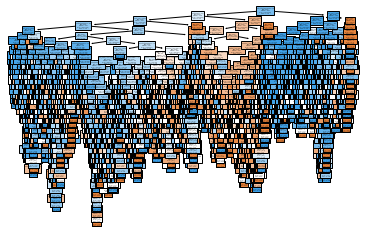

In [70]:
for algorithm, implementation in strategies.items():
    model, test_mean_absolute_error, test_mean_squared_error, test_root_mean_squared_error, elapsed_time = implementation(dataset, test, x_columns, y_columns, target_classes_name)
    algorithm_scores.loc[len(algorithm_scores)] = [algorithm, test_mean_absolute_error, test_mean_squared_error, test_root_mean_squared_error, elapsed_time]
    

In [71]:
algorithm_scores

,algorithm_name,mean_absolute_error,mean_squared_error,root_mean_squared_error,elapsed_time
0,logistic_classification_algorithm,0.202199,0.202199,0.449665,377.379
1,decision_tree_algorithm,0.187888,0.187888,0.433460,405.185
2,gaussian_naive_bayes_algorithm,0.204410,0.204410,0.452117,47.913
3,random_forest_regression_algorithm,0.245869,0.122078,0.349397,2648.288
4,linear_discriminant_analysis_algorithm,0.170874,0.170874,0.413369,1122.419
5,knn_classifier_algorithm,0.239482,0.239482,0.489369,4178.419
6,svn_algorithm,0.148701,0.148701,0.385618,129593.185
7,logistic_classification_algorithm,0.202199,0.202199,0.449665,360.034
8,decision_tree_algorithm,0.187888,0.187888,0.433460,400.042
9,gaussian_naive_bayes_algorithm,0.204410,0.204410,0.452117,60.018
